# Project 1.1: Understanding linear models on synthetic data

```
From ML Theory to Practice
Universität Potsdam, fall semester 2025

Authors: Juan L. Gamella and Simon Bing
License: CC-BY-4.0 https://creativecommons.org/licenses/by/4.0/
```

## Imports

These packages should already be installed in your Python virtual environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Generating synthetic data

<mark style="background-color: #db40e0ff;"> Task </mark> 

Write code to generate `N` samples from the following linear model

$Y := \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$

where $\beta \in \mathbb{R}^4$ and $\epsilon \sim \mathcal{N}(0,1)$, and $X_1$, $X_2$, $X_3$ are sampled independently and uniformly at random from $[0,10]$.

For now, set $\beta = (0,1,2,3)$, `N = 100` and store the samples in a dataframe with columns `X0, X1, X2, X3, Y`, where `X0` is just a vector of ones.

In [ ]:
true_coefficients = np.array([0,1,2,3])
def generate_dataset(N, seed, model_coefficients = true_coefficients):
    """
    Generates a DataFrame with N samples based on a linear model.

    Args:
        N (int): The number of samples to generate.
        seed (int): A seed for the random number generator for reproducibility.
        model_coefficients (np.ndarray): An array of the true model coefficients Beta.

    Returns:
        pd.DataFrame: A DataFrame containing the generated data.
    """
    rng = np.random.default_rng(seed);

    # create N random samples for each covariate and the error term
    X0 = np.ones(N); # Intercept
    X1 = rng.uniform(low=0, high=10, size=N);
    X2 = rng.uniform(low=0, high=10, size=N);
    X3 = rng.uniform(low=0, high=10, size=N);
    noiseTerm = rng.standard_normal(size=N);

    # Calculate the data points with the linear model formula
    Y = (model_coefficients[0]*X0 + 
         model_coefficients[1]*X1 + 
         model_coefficients[2]*X2 + 
         model_coefficients[3]*X3 + 
         noiseTerm)
    
    # Store in a dataframe    
    data = pd.DataFrame({'X0': X0, 'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})
    return data

In [3]:
data = generate_dataset(N=100, seed=42)

In [ ]:
print("First 5 rows of the generated data:")
data.head()


First 5 rows of the generated data:


,X0,X1,X2,X3,Y
0,1.0,7.739560,9.085807,7.774048,48.941148
1,1.0,4.388784,6.997071,9.718264,47.434232
2,1.0,8.585979,2.658700,5.007412,28.673637
3,1.0,6.973680,9.691764,1.438975,30.826695
4,1.0,0.941773,7.787509,0.139363,18.406372


# Question: Are the X continuous?

## Visualize the data

<mark style="background-color: #40E0D0;"> Task </mark> 

Before fitting a model, lets do a sanity check on the data. Make a corner plot using [`sns.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html), and specify `vars=['X1', 'X2', 'X3', 'Y']` and `corner=True`. Look at the row for `Y` vs. the other variables and check that there is indeed the linear effect you expect.

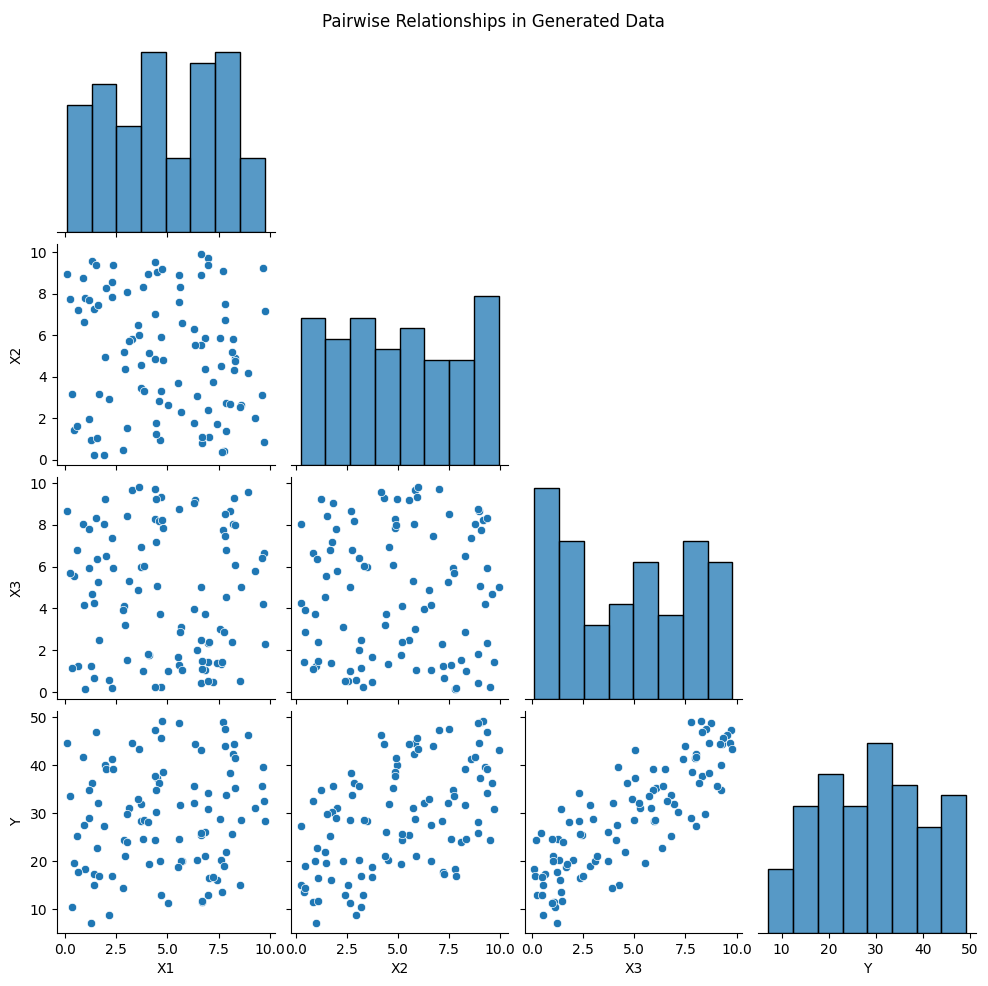

In [5]:
sns.pairplot(data, vars=['X1', 'X2', 'X3', 'Y'], corner=True)

# Display the plot
plt.suptitle('Pairwise Relationships in Generated Data')
plt.show()

<mark style="background-color: #648fff;">Question:</mark> Write down anything that surprises you to discuss later with your classmates.

X1 linearity? correlation? with Y is way less than X3. Guess because Parameter Beta_1 is smaller than Beta_3

## Fitting a linear model using `statsmodels`

Now, we will use statsmodels to fit a linear model using Ordinary Least Squares (OLS).

You can do this by calling:

```results = sm.OLS(<outcome>,<predictors>).fit()```

where `outcome` and `predictors` are dataframes. You can find an example [here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS) (feel free to ask your favorite chatbot for help).

<mark style="background-color: #40E0D0;"> Task </mark> 

Fit a linear model to predict `Y` from `X0, X1, X2, X3`. Store the fitted model in a variable called `results`.

In [6]:
# Separate outcome (Y) and predictors (X's) from dataframe
outcome = data['Y']
predictors = data[['X0', 'X1', 'X2', 'X3']]

# Fit the Ordinary Least Squares (OLS) model to estimate parameters Beta 
# that minimize the prediction error, between the predicted and observed values
results = sm.OLS(outcome, predictors).fit()

## Interpreting the results

<mark style="background-color: #40E0D0;"> Task </mark> 


Print the summary table of the linear model calling `print(results.summary())`.

In [7]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3777.
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           1.84e-99
Time:                        21:54:16   Log-Likelihood:                -142.63
No. Observations:                 100   AIC:                             293.3
Df Residuals:                      96   BIC:                             303.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             0.3439      0.337      1.021      0.3

According to the Model summary the Parameter Beta_1, Beta_2, Beta_3 are highly significant in explaining the outcome variable Y (t-val > 2 and p-val < 0.05). The effect of the respective parameter increases from Beta_1 to Beta_3 which isn't surprising as this reflects the true_parameters we set. 

All Betas are close to their respective true_parameter values and the Confidence Intervalls include them. 

<br>
<mark style="background-color: #648fff;">Question:</mark> What does the column `coef` show?

zeigt die estimated betas an

<mark style="background-color: #648fff;">Question:</mark> Why is $\hat{\beta}_0$ not zero?

müsste der error term sein

<mark style="background-color: #648fff;">Question:</mark> What do the columns `[0.025` and `0.975]` show?

It shows the 95% Confidence Intervall - lower and upper bounds - of the respective coefficients. We did a two-sided hypothesis test, so we have 2.5% on the left side and 2.5% on the right side. 

<mark style="background-color: #648fff;">Question:</mark> What does the columns `P>|t|` show? Why is the entry for `X0` larger than the others?

shows the p-val, meaning the probability. Größer als 0.05, damit X_0 nicht significant in explaining the data. Ist ja die Intercept, die immer 1 ist. Liegt es daran?

<mark style="background-color: #648fff;">Question:</mark> Change the random seed above, generate fresh data, and re-fit the model. What has happened to the values in `P>|t|`? Why?

They changed. Draw values from a random distribution, so they change in each durchgang. Just if we set a seed at the beginning we make sure, that always the same samples are drawn. Dient der Vergleichbarkeit der Ergebnisse. 

<mark style="background-color: #648fff;">Question:</mark> If you increase the sample size `N`, what will happen to the columns `coef`, `P>|t|`, `[0.025`, and `0.975]`?

Sollten stärker an die Normalverteilung herangehen und damit auch an E[\mu], also immer näher an den true parameter - fehler bzw. schwankung wird immer kleiner. Konfidenzintervall sollte kleiner werden. Wert sollte immer significanter werden. 

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, generate fresh data with `N=1000` and `N=10000` and check your hypothesis:

In [8]:
data_mediumSize = generate_dataset(N=1000, seed=42)
data_largeSize = generate_dataset(N=10000, seed=42)

In [9]:
outcome_mediumSize = data_mediumSize['Y']
predictors_mediumSize = data_mediumSize[['X0', 'X1', 'X2', 'X3']]

results_mediumSize = sm.OLS(outcome_mediumSize, predictors_mediumSize).fit()

print(results_mediumSize.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.848e+04
Date:                Mon, 20 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:54:16   Log-Likelihood:                -1411.1
No. Observations:                1000   AIC:                             2830.
Df Residuals:                     996   BIC:                             2850.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             0.0680      0.100      0.681      0.4

In [10]:
outcome_largeSize = data_largeSize['Y']
predictors_largeSize = data_largeSize[['X0', 'X1', 'X2', 'X3']]

results_largeSize = sm.OLS(outcome_largeSize, predictors_largeSize).fit()

print(results_largeSize.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.792e+05
Date:                Mon, 20 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:54:16   Log-Likelihood:                -14282.
No. Observations:               10000   AIC:                         2.857e+04
Df Residuals:                    9996   BIC:                         2.860e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0            -0.0360      0.032     -1.119      0.2

<br>
<mark style="background-color: #648fff;">Question:</mark> What happened when you increased the sample size? Was your hypothesis correct?

Genau wie in den "Hypothesen" beschrieben. 

## Understanding confidence intervals

We will now do a few experiments to test your understanding of confidence intervals.

You can access the $\alpha=0.05$ confidence interval computed by a model by calling `results.conf_int()`.

In [11]:
results.conf_int()

,0,1
X0,-0.324810,1.012686
X1,0.864464,1.015957
X2,1.943834,2.085686
X3,2.924888,3.058829


Where the rows correspond to the coefficient for each predictor, and the columns give you the lower (0) and upper (1) bound. You can access using `.loc`:

In [12]:
# The lower bound on the CI for X1
results.conf_int().loc['X1', 0]

np.float64(0.8644640542170633)

To access the actual estimates for the coefficients, you can call `results.params`:

In [13]:
results.params

X0    0.343938
X1    0.940210
X2    2.014760
X3    2.991859
dtype: float64

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, write code to
- generate a fresh dataset with a different random seed (but same N=100 and true_coefficients).
- fit a linear model on this dataset
- store the coefficient estimates and the confidence intervals for each model
  
Run this code 1000 times, storing the results in (for example) `all_coefs` and `all_cis`.

In [ ]:
#k = 1000;
k = 5;
all_coefs = []
all_cis = []

for i in range(0,k):
    # data = generate_dataset(N=100, seed=87);
    data = generate_dataset(N=10, seed=87);
    Y = data['Y']
    X = data[['X0', 'X1', 'X2', 'X3']]

    results = sm.OLS(Y, X).fit()
    all_coefs.append(results.params)
    all_cis.append(results.conf_int())

all_coefs = np.array(all_coefs)
all_cis = np.array(all_cis)


In [ ]:
all_coefs
all_cis

AttributeError: 'list' object has no attribute 'shape'

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, for each variable `const, X1, X2, X3` plot the distribution of the fitted coefficients using [`sns.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

In [22]:
# TODO: your code goes here

<br>
<mark style="background-color: #648fff;">Question:</mark> What kind of distributions are these?

sample distributions - normal distributions, central limit theorem / stats2

<br>
<mark style="background-color: #648fff;">Question:</mark> Why does the distribution for the coefficient of $X_0$ have larger variance?

#### TODO

<br>
<mark style="background-color: #40E0D0;"> Task </mark> 

Now, make the following plot to visualize the confidence intervals resulting from the 1000 models.

For each variable $X_j \in $(`X0, ..., X3`):

- Using [`plt.hlines`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html) plot each $\alpha = 0.95$ interval as a horizontal line, extending from its lower to upper limits. The line should be drawn at height `y=i`, where `i` is the index of the model (out of the 1000 fitted above).
- Using [`plt.vlines`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html), draw a vertical line (e.g., in red), at the value of the true coefficient $\beta_j$ for that variable.

In [ ]:
# TODO: your code goes here

<br>


<mark style="background-color: #648fff;">Question:</mark> Now, make a guess: for the resulting confidence intervals, what precentage do you think contain the true coefficients $\beta_0, \ldots, \beta_3$. Will this percentage be the same for all coefficients? 

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Now, for each variable ($X_0, X_1, X_2, X_3$), compute how often the true coefficient falls inside the corresponding confidence interval (i.e., give a percentage).

In [ ]:
# TODO: your code goes here

<br>
<mark style="background-color: #648fff;">Question:</mark> Was your prediction correct? If not, what do you think is happening?

Now, we will do the same, but this time we will count how often the coefficients of all variables _simultaneously_ fall inside their confidence intervals.

<mark style="background-color: #648fff;">Question:</mark>  Will the resulting percentage be higher, lower or the same (make a guess)? Try to explain your reasoning.

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Now write the code to compute the simultaneous coverage percentage.

In [ ]:
# TODO: your code goes here

<br>
<mark style="background-color: #648fff;">Question:</mark>  Were you right in your predicition? If not, what could be going wrong?

## Understanding prediction intervals

We will now look at prediction intervals.

Given a DataFrame `new_covariates` containing observations of covariates (i.e., the predictors `X0, ..., X1`), you can compute the prediction intervals at level $alpha=0.05$ for each observation by calling:

In [ ]:
new_covariates = fresh_data[['X0','X1', 'X2', 'X3']] # As a placeholder for this example
results.get_prediction(new_covariates).summary_frame(alpha=0.05)

The limits of the prediction interval are given by `obs_ci_lower` and `obs_ci_upper`.

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Generate a fresh dataset by calling `generate_dataset`. Pick a random seed that has not been selected before and set `N=1000`. Then compute the prediction intervals for each observation following the example above.

In [ ]:
# TODO: your code goes here

<br>
<mark style="background-color: #648fff;">Question:</mark> Now, make a guess. What percentage of the measured outcomes ($Y$) will be contained inside their prediction interval?

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Compute the actual percentage and print it.

In [ ]:
# TODO: your code goes here

<br>
<mark style="background-color: #648fff;">Question:</mark> Was your hypothesis correct? If not, what is going wrong (make a guess).